# Network Analysis of Zachary's Karate Club

Network analysis has various applications, including social structure analysis, fraud detection, and more. In this notebook, you will analyze the structure of graphs using the `NetworkX` package. You will use the popular Zachary's karate club dataset ([source](http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/zachary.dat)).  

Wayne W. Zachary [1] analyzed the social network of a university [karate club](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) from 1970 to 1972. Documenting interactions among 34 members through 78 pairwise links, he found that during the study, a conflict arose between administrator "John A." and instructor "Mr. Hi" that eventually split the club into two factions. Half of the members formed a new club around Mr. Hi, and members from the other part found a new instructor or gave up karate. 
 Using a capacitated network model, he accurately assigned almost all members to their respective groups after the split, demonstrating how network bottlenecks in information flow can drive organizational fission.

[1] W. Zachary, An information flow model for conflict and fission in small groups, Journal of Anthropological Research 33, 452-473 (1977)

## Exercises

**Exercise 1.**
Write a Python function to <span style='color: red;'>calculate</span> the degree centrality for each node, <span style='color: red;'>sort</span> the nodes based on their degree centrality, and <span style='color: red;'>print</span> the top 5 nodes. Who has the highest connectivity?

In [18]:
import networkx as nx

def top_degree_centrality_nodes(graph, top_nodes=5):
    if graph.number_of_nodes() == 0:
        print("The graph is empty.")
        return None

    # Calculate degree centrality for all nodes
    degree_centrality = nx.degree_centrality(graph)
    
    # Sort nodes based on degree centrality in descending order
    sorted_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
    
    # Adjust top_nodes if it exceeds the number of nodes
    top_n = min(top_nodes, len(sorted_nodes))
    
    # Print the top 5 nodes with their degree centrality
    print(f"\nTop {top_nodes} nodes with the highest degree centrality:")
    for i, (node, centrality) in enumerate(sorted_nodes[:top_nodes], start=1):
        print(f"{i}. Node {node} with degree centrality: {centrality:.2f}")
    
    # Print the top node separately
    highest_node, highest_centrality = sorted_nodes[0]
    print(f"\nNode {highest_node} has the highest degree centrality: {highest_centrality:.2f}")
    
    return highest_node

# Load Zachary's Karate Club graph
G = nx.karate_club_graph()

# Analyze the top nodes with the highest degree centrality
highest_node = top_degree_centrality_nodes(G)



Top 5 nodes with the highest degree centrality:
1. Node 33 with degree centrality: 0.52
2. Node 0 with degree centrality: 0.48
3. Node 32 with degree centrality: 0.36
4. Node 2 with degree centrality: 0.30
5. Node 1 with degree centrality: 0.27

Node 33 has the highest degree centrality: 0.52


**Exercise 2.** Discuss the role of each community by answering the questions below.   

    (a) How tightly are they connected internally, and how do they connect to other communities? 
    (b) Are there any “bridge” nodes between communities, and what roles do they play? 
    (c) How could removing specific nodes impact inter-community connectivity? Write a Python function to remove the specific nodes and visualize the impact. 

 **(a)** **Internal connectivity** measures how strongly members of the same community are connected. A community is said to be tightly connected if most nodes in the community are directly or indirectly linked to each other, forming a dense subgraph. We can analyze the degree centrality of the nodes in the comminuty to determine how tightly they are connected internally. The following python code calculates the degree centrality of each nodes within its community:

In [19]:
import networkx.algorithms.community as nxcom
import numpy as np
import networkx as nx

# Load data into numpy matrix
FILENAME = "zachary_karateclub.csv"
data=np.loadtxt(open(FILENAME, "rb"), delimiter=",")

# Set up networkx graph G from numpy matrix
G = nx.from_numpy_matrix(data)

communities = sorted(nxcom.greedy_modularity_communities(G), key=len, reverse=True)

# Degree centrality for nodes in all communities
for i, community in enumerate(communities[:3]): 
    subgraph = G.subgraph(community)  # Create a subgraph for each community
    deg_cent = nx.degree_centrality(subgraph)  # Calculate degree centrality
    
    # Rounding degree centrality values
    rounded_deg_cent = {node: round(centrality, 2) for node, centrality in deg_cent.items()}
    print(f"Degree centrality for nodes in Community {i}: {rounded_deg_cent}")
    
    # Calculate average degree centrality for the community
    avg_deg_cent = sum(deg_cent.values()) / len(deg_cent)
    print(f"Average degree centrality for Community {i}: {avg_deg_cent:.2f}\n")




Degree centrality for nodes in Community 0: {8: 0.19, 14: 0.12, 15: 0.12, 18: 0.12, 20: 0.12, 22: 0.12, 23: 0.31, 24: 0.19, 25: 0.19, 26: 0.12, 27: 0.19, 28: 0.12, 29: 0.25, 30: 0.19, 31: 0.31, 32: 0.69, 33: 0.88}
Average degree centrality for Community 0: 0.25

Degree centrality for nodes in Community 1: {1: 0.75, 2: 0.62, 3: 0.62, 7: 0.38, 9: 0.12, 12: 0.12, 13: 0.38, 17: 0.12, 21: 0.12}
Average degree centrality for Community 1: 0.36

Degree centrality for nodes in Community 2: {0: 0.86, 4: 0.43, 5: 0.57, 6: 0.57, 10: 0.43, 11: 0.14, 16: 0.29, 19: 0.14}
Average degree centrality for Community 2: 0.43



## **Explanation of the result of the above python code**

**Community 0:**

Average degree centrality: 0.25

Community 0 is moderately connected internally. Some nodes (like node 33 with 0.88 and node 32 with 0.69) are highly connected within the community, but others (such as nodes with centralities of 0.12) are more loosely connected. This suggests a structure where a few key nodes act as hubs, connecting others in the community.

**Community 1:**

Average degree centrality: 0.36

Community 1 is more tightly connected than Community 0, with higher average degree centrality. Nodes 1, 2, and 3 have high degree centralities (0.75, 0.62, 0.62), indicating a denser internal structure. However, there are still less-connected nodes (like nodes 9, 12, and 17 with 0.12), which suggests some peripheral members in the community.

**Community 2:**

Average degree centrality: 0.43
Community 2 is the most tightly connected of the three, as indicated by its highest average degree centrality. Node 0 (0.86) acts as a central hub, with several nodes having relatively high centralities (e.g., nodes 5 and 6 with 0.57). There are fewer peripheral nodes compared to the other communities, suggesting a strong internal cohesion.

## **Inter-Community connectivity**

Inter-community connections are demonstrated by edges linking nodes from different communities, which act as bridges facilitating communication and interaction between otherwise separate groups. The strength of these connections can be gauged by counting the edges between communities; more edges indicate stronger inter-community ties. Visualizing these connections shows how communities are not isolated but interdependent, forming a larger network. Key nodes, often acting as bridges, play a crucial role in maintaining these links, and removing them can disrupt the connectivity between communities, leading to fragmentation. This highlights the integrated nature of the network, where communities interact and depend on each other.

The following pyhton code prints the list of and number of edges between different communities and the nodes that are connected to all the three communities.

Inter-community connections (edges between communities):
Between Community 1 and Community 2: 9 edge(s)
Between Community 0 and Community 2: 3 edge(s)
Between Community 0 and Community 1: 7 edge(s)
Nodes connected to all three communities: [0, 1, 2, 8, 13, 19, 33]


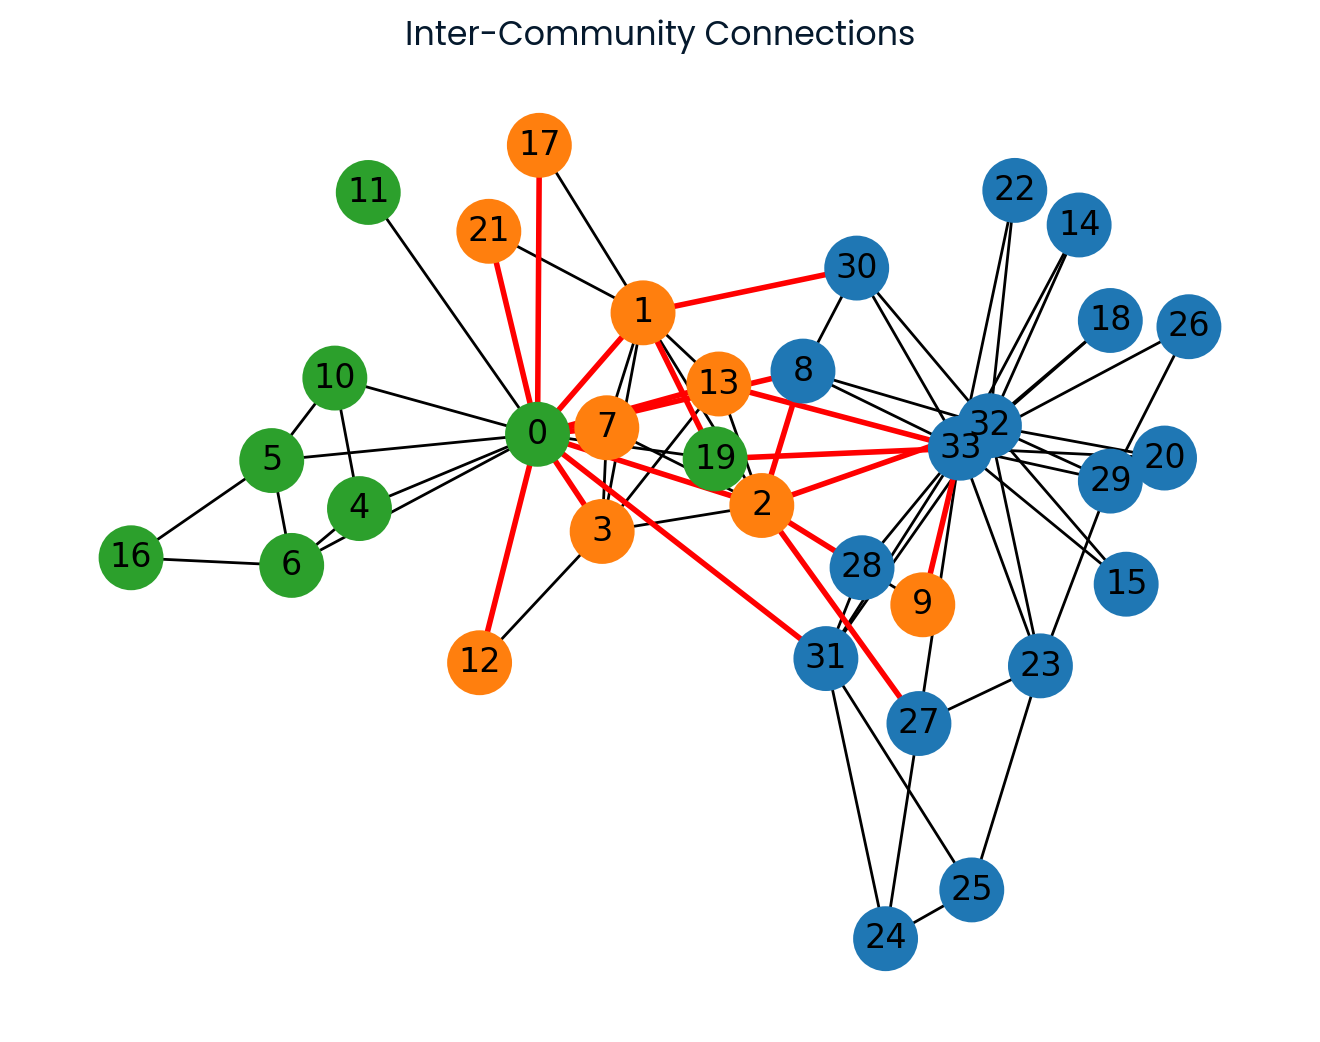

In [25]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import networkx.algorithms.community as nxcom

# Load data into numpy matrix
FILENAME = "zachary_karateclub.csv"
data = np.loadtxt(open(FILENAME, "rb"), delimiter=",")

# Set up networkx graph G from numpy matrix
G = nx.from_numpy_matrix(data)

# Identify communities
communities = sorted(nxcom.greedy_modularity_communities(G), key=len, reverse=True)

# Function to identify inter-community edges
def get_inter_community_edges(G, communities):
    inter_community_edges = []
    for edge in G.edges():
        node1, node2 = edge
        # Check if nodes belong to different communities
        for i, comm1 in enumerate(communities):
            for j, comm2 in enumerate(communities):
                if i != j and (node1 in comm1 and node2 in comm2):
                    inter_community_edges.append(edge)
    return inter_community_edges

# Get inter-community edges
inter_community_edges = get_inter_community_edges(G, communities)

# Count edges between each pair of communities
def count_inter_community_edges(communities, inter_community_edges):
    community_pairs = {}
    for edge in inter_community_edges:
        node1, node2 = edge
        for i, comm1 in enumerate(communities):
            for j, comm2 in enumerate(communities):
                if i != j and (node1 in comm1 and node2 in comm2):
                    pair = tuple(sorted((i, j)))  
                    community_pairs[pair] = community_pairs.get(pair, 0) + 1
    return community_pairs

# Count the number of edges between communities
community_edge_counts = count_inter_community_edges(communities, inter_community_edges)

# Print the inter-community connections in a user-friendly format
print("Inter-community connections (edges between communities):")
for pair, count in community_edge_counts.items():
    comm1, comm2 = pair
    print(f"Between Community {comm1} and Community {comm2}: {count} edge(s)")


# Load data into numpy matrix
FILENAME = "zachary_karateclub.csv"
data = np.loadtxt(open(FILENAME, "rb"), delimiter=",")

# Set up networkx graph G from numpy matrix
G = nx.from_numpy_matrix(data)

# Get communities using modularity-based community detection
import networkx.algorithms.community as nxcom
communities = sorted(nxcom.greedy_modularity_communities(G), key=len, reverse=True)

# Function to find nodes that are connected to all three communities
def connected_to_all_communities(G, communities):
    # Initialize a list to store nodes connected to all three communities
    connected_nodes = []
    
    # Get the set of nodes for each community
    community_0 = set(communities[0])
    community_1 = set(communities[1])
    community_2 = set(communities[2])
    
    # Iterate over all nodes in the graph
    for node in G.nodes():
        neighbors = set(G.neighbors(node))  # Get neighbors of the node
        
        # Check if the node is connected to nodes from all three communities
        if (community_0 & neighbors) and (community_1 & neighbors) and (community_2 & neighbors):
            connected_nodes.append(node)
    
    return connected_nodes

# Get the list of nodes connected to all three communities
nodes_connected_to_all = connected_to_all_communities(G, communities)
print("Nodes connected to all three communities:", nodes_connected_to_all)


# Visualize the inter-community connections
pos = nx.spring_layout(G, seed=7)  

# Color map for communities
COLORS = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

# Assign colors to nodes based on their community
color_map = []
for node in G.nodes():
    for i, comm in enumerate(communities):
        if node in comm:
            color_map.append(COLORS[i])
            break

# Draw the graph with node colors
nx.draw(G, pos, node_color=color_map, with_labels=True, node_size=500)

# Highlight inter-community edges in red
nx.draw_networkx_edges(G, pos, edgelist=inter_community_edges, edge_color="red", width=2)

plt.title("Inter-Community Connections")
plt.show()


Based on the result, we can conclude that the communities are interconnected. The presence of edges between different communities indicates that there are connections between them, showing that the communities are not isolated but have interactions with one another. For example:

There are 9 edges between Community 1 and Community 2, suggesting a relatively strong connection between these two communities.

The 7 edges between Community 0 and Community 1, and the 3 edges between Community 0 and Community 2, indicate that there are also connections, although the strength of these connections varies.

And also nodes 0, 1, 2, 8, 13, 19 and 33 are connected to the three communities.

These inter-community connections suggest that while each community may have tight internal connectivity, there are also established pathways linking them together, allowing information or influence to flow between communities. The varying number of edges between communities also reflects the degree to which they are interconnected.

(b) A **bridge** node in a network is a node that connects two or more distinct communities or subgroups. It serves as a link between these groups, enabling communication or interaction between them. Without bridge nodes, the communities would be more isolated from each other.

From the previous Python code, we can observe several bridge nodes that connect two or more communities. For instance, there are 9 edges between Community 1 and Community 2, 7 edges between Community 0 and Community 1, and 3 edges between Community 0 and Community 2. And also nodes 0, 1, 2, 8, 13, 19 and 33 are connected to the three communities. These edges represent the bridge nodes, the nodes responsible for linking different communities together.

**The role of bridge nodes**
These nodes act as bridges that connect different communities. Without these nodes, the communities would become isolated and unable to interact.

Bridge nodes play a crucial role in ensuring that the network remains cohesive and interconnected. They facilitate the flow of information, influence, or resources between otherwise distinct groups.

If a bridge node is removed, it could cause a disruption in communication or interaction between the communities, potentially splitting the network into disconnected subgraphs.

(c) Removing specific nodes from a network can significantly impact inter-community connectivity. If nodes that act as "bridge nodes"—i.e., nodes that connect multiple communities, are removed, it may lead to a situation where communities become disconnected from one another, fragmenting the network into isolated subgraphs. In such cases, the flow of information, influence, or resources between communities could be disrupted, which can decrease the overall cohesion and functionality of the network.

Below is a Python function that removes specific nodes, calculates the resulting connected components, and visualizes the network before and after the removal:

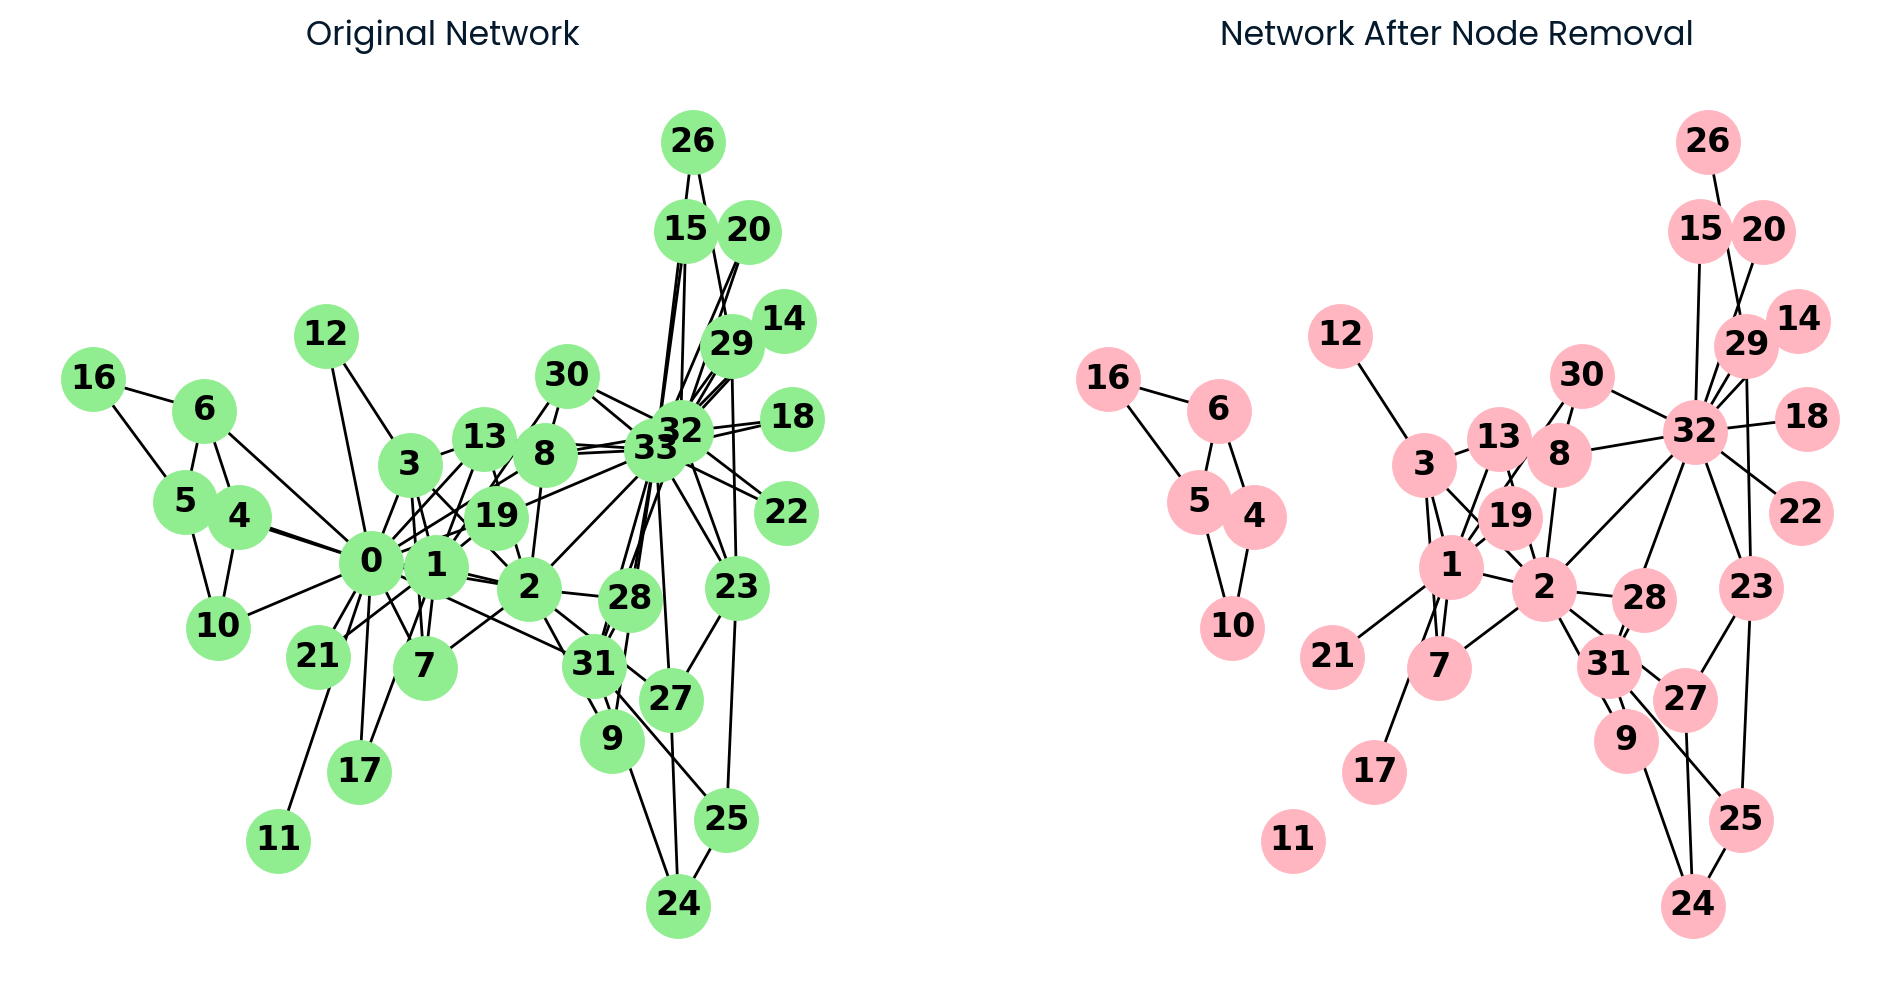

Connected components after node removal: [{1, 2, 3, 7, 8, 9, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32}, {4, 5, 6, 10, 16}, {11}]


In [28]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Load data into numpy matrix
FILENAME = "zachary_karateclub.csv"
data = np.loadtxt(open(FILENAME, "rb"), delimiter=",")

# Set up networkx graph G from numpy matrix
G = nx.from_numpy_matrix(data)

# Get communities using modularity-based community detection
import networkx.algorithms.community as nxcom
communities = sorted(nxcom.greedy_modularity_communities(G), key=len, reverse=True)

# Function to remove specific nodes and visualize the impact on inter-community connectivity
def remove_nodes_and_visualize(G, nodes_to_remove):
    # Copy the original graph to avoid altering the original one
    G_copy = G.copy()
    
    # Remove the specified nodes from the graph
    G_copy.remove_nodes_from(nodes_to_remove)
    
    # Calculate the connected components after removal
    connected_components = list(nx.connected_components(G_copy))
    
    # Plot the original network
    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    pos = nx.spring_layout(G)  # Layout for visualization
    nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightgreen', font_weight='bold')
    plt.title("Original Network")
    
    # Plot the network after node removal
    plt.subplot(122)
    nx.draw(G_copy, pos, with_labels=True, node_size=500, node_color='lightpink', font_weight='bold')
    plt.title("Network After Node Removal")
    
    # Show the plots
    plt.show()
    
    # Print the connected components to see how the network is fragmented
    print("Connected components after node removal:", connected_components)

# Example: Nodes to remove (you can specify the bridge nodes you want to remove here)
nodes_to_remove = [0, 33]  # These can be nodes connecting different communities

# Call the function
remove_nodes_and_visualize(G, nodes_to_remove)


Removing nodes 33 and 0 has fragmented the network into three disconnected subgraphs. Prior to their removal, these nodes likely acted as important connectors between different communities. After removing them, the network split into:

1. A large subgraph with 26 nodes still interconnected.
2. A smaller subgraph with 5 nodes.
3. An isolated subgraph with just 1 node.

This disruption highlights the critical role of certain nodes (especially bridge nodes) in maintaining inter-community connectivity. Without these nodes, communication and interaction between communities are blocked, leading to isolated subgroups within the network.

**Exercise 3**. Write a python function for calculating the average shortest path length for the entire network. How does this value change if a high-centrality node is removed?

**Code to calculate average shortest path length before removing a high-centrality node:**

In [14]:
import networkx as nx
import numpy as np

# Load data into numpy matrix
FILENAME = "zachary_karateclub.csv"
data = np.loadtxt(open(FILENAME, "rb"), delimiter=",")

# Create the graph from the adjacency matrix
G = nx.from_numpy_matrix(data)

# Function to calculate average shortest path length
def average_shortest_path_length(graph):
    try:
        return nx.average_shortest_path_length(graph)
    except nx.NetworkXError:
        return None  

# Calculate and print the average shortest path length for the original graph
original_avg_path_length = average_shortest_path_length(G)
if original_avg_path_length is not None:
    print(f"Original average shortest path length: {round(original_avg_path_length, 2)}")
else:
    print("The graph is disconnected, so no average shortest path length.")


Original average shortest path length: 2.41


**Code to calculate average shortest path length after removing a high-centrality node:**

In [30]:
import networkx as nx
import numpy as np

# Load data into numpy matrix
FILENAME = "zachary_karateclub.csv"
data = np.loadtxt(open(FILENAME, "rb"), delimiter=",")

# Create the graph from the adjacency matrix
G = nx.from_numpy_matrix(data)

# Function to calculate average shortest path length
def average_shortest_path_length(graph):
    try:
        return nx.average_shortest_path_length(graph)
    except nx.NetworkXError:
        return None  # In case the graph is disconnected

# Identify the high-centrality node
deg_cent = nx.degree_centrality(G)
high_centrality_node = max(deg_cent, key=deg_cent.get)

# Remove the high-centrality node
G_removed = G.copy()
G_removed.remove_node(high_centrality_node)

# Calculate the average shortest path length after node removal
new_avg_path_length = average_shortest_path_length(G_removed)
if new_avg_path_length is not None:
    print(f"Average shortest path length after removing node {high_centrality_node}: {round(new_avg_path_length, 2)}")
else:
    print(f"The graph is disconnected after removing node {high_centrality_node}, so no average shortest path length.")


Average shortest path length after removing node 33: 2.6


Removing node 33 increased the average shortest path length from 2.41 to 2.6, suggesting that node 33 was likely a central connector in the network. Its removal caused other nodes to become more distant from each other, making the network less efficient in terms of connectivity. This indicates that node 33 played a crucial role in reducing the distance between other nodes.

**Exercise 4**. Write a python function for finding the longest shortest path in the network, also known as the network diameter. Which nodes are involved, and what does this path tell you about network spread?

Network Diameter: 5
Nodes involved in the longest shortest path: [14, 32, 2, 0, 5, 16]


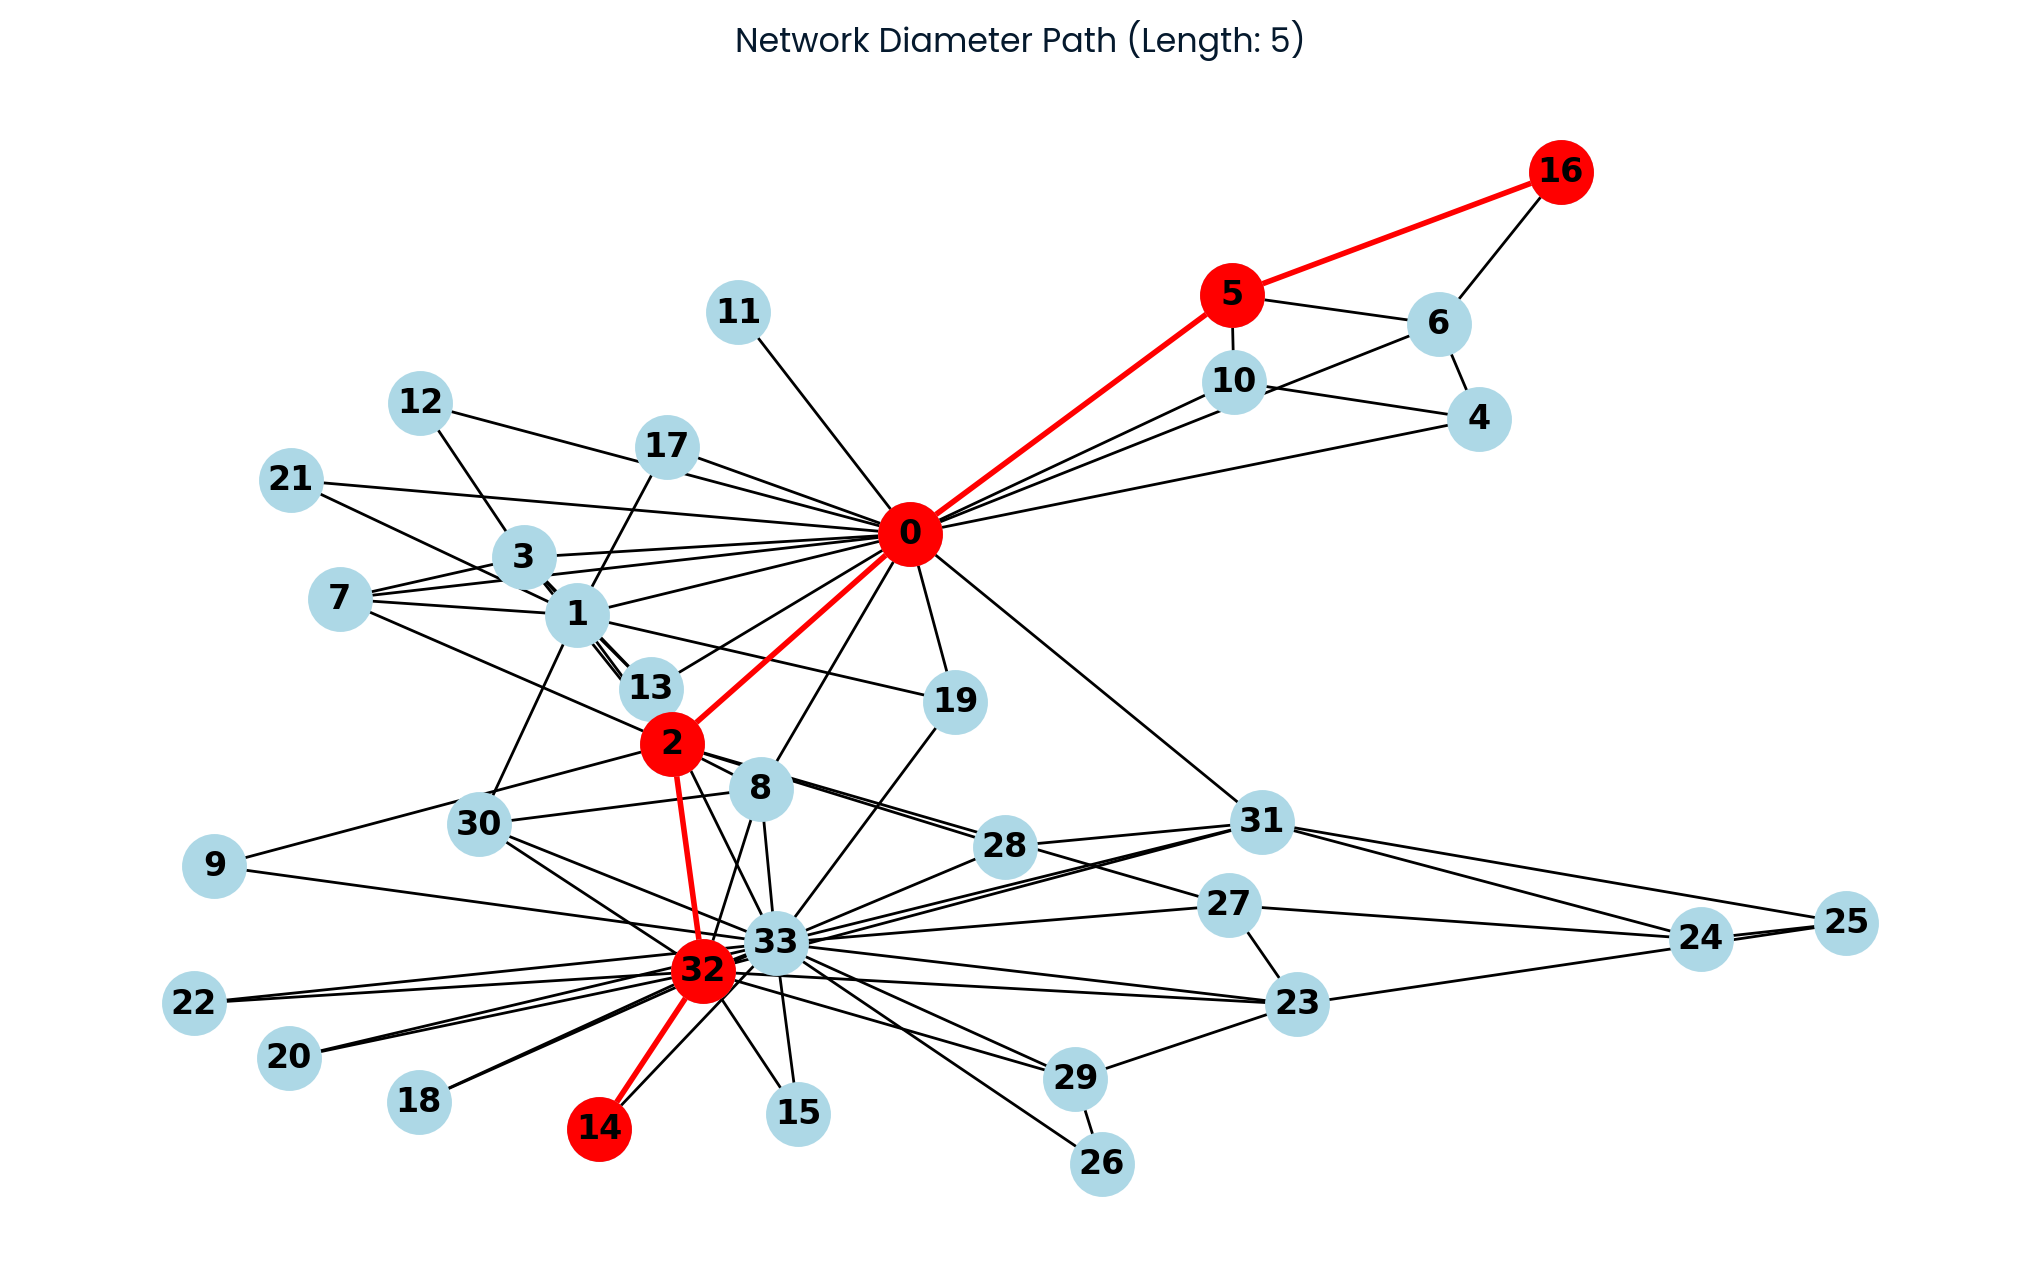

In [31]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Function to find the diameter of the network
def network_diameter(G):
    diameter = nx.diameter(G)
    
    # Find the nodes involved in the longest shortest path (network diameter)
    # Use the pair of nodes that are the farthest apart
    node_pairs = nx.periphery(G)
    longest_path = []
    for node1 in node_pairs:
        for node2 in node_pairs:
            if node1 != node2:
                path = nx.shortest_path(G, source=node1, target=node2)
                if len(path) - 1 == diameter:
                    longest_path = path
                    break
        if longest_path:
            break
    
    return diameter, longest_path

# Example usage:
FILENAME = "zachary_karateclub.csv"
data = np.loadtxt(open(FILENAME, "rb"), delimiter=",")
G = nx.from_numpy_matrix(data)

diameter, path = network_diameter(G)
print(f"Network Diameter: {diameter}")
print(f"Nodes involved in the longest shortest path: {path}")

# Visualizing the network with the diameter path highlighted

# Create a layout for the network
pos = nx.spring_layout(G, seed=42)

# Plot the original network
plt.figure(figsize=(10, 6))

# Draw the entire graph in light blue
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_weight='bold')

# Highlight the nodes in the longest path (diameter)
node_colors = ['red' if node in path else 'lightblue' for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='red', node_size=500)

# Highlight the edges in the longest path (diameter)
edges_in_path = [(path[i], path[i+1]) for i in range(len(path)-1)]
nx.draw_networkx_edges(G, pos, edgelist=edges_in_path, edge_color='red', width=2)

# Show the plot with a title
plt.title(f"Network Diameter Path (Length: {diameter})")
plt.show()


**Network Diameter:** The diameter is the longest shortest path between any two nodes in the network, which gives an idea of how spread out or connected the network is. 

The diameter represents the "spread" of the network. A large diameter indicates that the network has long paths, meaning it might take many hops for information or influence to travel between certain nodes. Conversely, a small diameter implies that most nodes are relatively close, suggesting that the network is tightly connected


**Exercise 5**. Find the nodes that appear most frequently in shortest paths between other pairs of nodes. What roles do these nodes play in network connectivity?

To find the nodes that appear most frequently in the shortest paths between other pairs of nodes, we can use betweenness centrality. 

**Betweenness centrality** measures how often a node appears on the shortest path between two other nodes. High betweenness centrality indicates that a node is an important "bridge" in the network, facilitating communication or interaction between different parts of the network.

In [18]:
import networkx as nx
import numpy as np

# Function to calculate betweenness centrality
def calculate_betweenness_centrality(G):
    betweenness = nx.betweenness_centrality(G)    
    return betweenness

# Create a graph G (Example: Use a predefined graph or load your graph here)
FILENAME = "zachary_karateclub.csv"
data = np.loadtxt(open(FILENAME, "rb"), delimiter=",")
G = nx.from_numpy_matrix(data)

# Calculate betweenness centrality for the graph
betweenness = calculate_betweenness_centrality(G)

# Sort nodes by their betweenness centrality in ascending order
sorted_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)

# Display the top 5 nodes with highest betweenness centrality
print("Top 5 nodes with highest betweenness centrality:")
for node, centrality in sorted_betweenness[:5]:
    print(f"Node {node}: Betweenness Centrality = {centrality:.4f}")


Top 5 nodes with highest betweenness centrality:
Node 0: Betweenness Centrality = 0.4376
Node 33: Betweenness Centrality = 0.3041
Node 32: Betweenness Centrality = 0.1452
Node 2: Betweenness Centrality = 0.1437
Node 31: Betweenness Centrality = 0.1383


Nodes with **high betweenness centrality** serve as important **bridge** or **connector** nodes in a network. They play a crucial role by linking different segments of the network that would otherwise be disconnected. These nodes ensure that communication or interaction flows between otherwise distant communities or groups, acting as the key pathways for information to travel across the network.

Moreover, these nodes are critical for **communication** within the network. If such nodes were removed, the network could break apart, splitting into smaller disconnected subgraphs. This would result in a disruption of the communication and interaction between previously connected parts of the network, making them vital for maintaining the network's integrity and cohesion.

**Exercise 6**. If a node is removed from the network, recalculate the shortest paths for affected node pairs. How does the removal impact the overall average shortest path length and network connectivity?

**Low Degree Centrality Node Removal:**

Removing a low degree centrality (DC) node typically decreases the average shortest path length because these nodes are connected to very few other nodes and are rarely part of the shortest paths between other node pairs. When such nodes are removed, the network no longer needs to account for them in pathfinding, which can lead to shorter overall distances between the remaining nodes. This removal generally has a minor impact on the network’s connectivity, as low DC nodes do not significantly affect the connectivity or flow of information within the network. As a result, the network remains mostly unaffected in terms of overall structure, but the efficiency of communication between nodes improves.

**High Degree Centrality Node Removal:**

Removing a high degree centrality (DC) node generally increases the average shortest path length because these nodes serve as hubs, connecting various parts of the network. Their removal disrupts multiple shortest paths, forcing the network to find alternative routes, which often results in longer paths between some node pairs. This removal can have a significant impact on network connectivity, potentially causing parts of the network to become less efficiently connected. The absence of a high DC node can lead to more isolated clusters within the network, increasing the distance between them and affecting the overall flow of information.

In [34]:
import networkx as nx

def recalculate_affected_shortest_paths(G, node_to_remove):
    # Make a copy of the graph and remove the node
    G_copy = G.copy()
    G_copy.remove_node(node_to_remove)
    
    # Get the shortest path lengths before and after the node removal
    original_shortest_paths = dict(nx.all_pairs_shortest_path_length(G))
    new_shortest_paths = dict(nx.all_pairs_shortest_path_length(G_copy))

    # Find the affected node pairs (where the shortest path has changed)
    affected_pairs = [
        (source, target, original_shortest_paths[source][target], 
         new_shortest_paths[source].get(target, float('inf')))
        for source in original_shortest_paths
        for target in original_shortest_paths[source]
        if target != node_to_remove and source != node_to_remove
        and original_shortest_paths[source][target] != new_shortest_paths[source].get(target, float('inf'))
    ]
    
    return affected_pairs, original_shortest_paths, new_shortest_paths

def calculate_average_shortest_path_length(shortest_paths):
    #Calculate the average shortest path length for a given set of shortest paths.
    total_distance = sum(length for source in shortest_paths for target in shortest_paths[source] 
                         for length in [shortest_paths[source][target]])
    count = sum(1 for source in shortest_paths for target in shortest_paths[source])
    
    return total_distance / count if count else float('inf')

def analyze_node_removal(G, node_to_remove):
    # Recalculate affected shortest paths after node removal
    affected_pairs, original_shortest_paths, new_shortest_paths = recalculate_affected_shortest_paths(G, node_to_remove)
    
    # Calculate the average shortest path lengths before and after removal
    original_avg_shortest_path = calculate_average_shortest_path_length(original_shortest_paths)
    new_avg_shortest_path = calculate_average_shortest_path_length(new_shortest_paths)
    
    # Output results
    print(f"\nOriginal average shortest path length: {original_avg_shortest_path:.2f}")
    print(f"New average shortest path length after removing node {node_to_remove}: {new_avg_shortest_path:.2f}")
    print()
    
    # Output affected node pairs
    if affected_pairs:
        print(f"Node {node_to_remove} removal affects the following node pairs:\n")
        for pair in affected_pairs:
            print(f"Affected node pair: ({pair[0]} , {pair[1]})")
            print(f"Original shortest path length: {pair[2]}")
            print(f"New shortest path length: {pair[3]}")
            print(" ")
    else:
        print(f"No affected node pairs when removing node {node_to_remove}.")
        

# Example: Karate Club graph
G = nx.karate_club_graph()

# Analyze the effect of removing a low-centrality node
analyze_node_removal(G, 11)

# Analyze the effect of removing a high-centrality node
analyze_node_removal(G, 33)



Original average shortest path length: 2.34
New average shortest path length after removing node 11: 2.32

No affected node pairs when removing node 11.

Original average shortest path length: 2.34
New average shortest path length after removing node 33: 2.52

Node 33 removal affects the following node pairs:

Affected node pair: (0 , 26)
Original shortest path length: 3
New shortest path length: 4
 
Affected node pair: (1 , 26)
Original shortest path length: 3
New shortest path length: 4
 
Affected node pair: (3 , 26)
Original shortest path length: 3
New shortest path length: 4
 
Affected node pair: (4 , 26)
Original shortest path length: 4
New shortest path length: 5
 
Affected node pair: (5 , 26)
Original shortest path length: 4
New shortest path length: 5
 
Affected node pair: (6 , 26)
Original shortest path length: 4
New shortest path length: 5
 
Affected node pair: (8 , 26)
Original shortest path length: 2
New shortest path length: 3
 
Affected node pair: (9 , 14)
Original short